In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.core import datetools
from pandas import Series, DataFrame
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt


C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


Your goal is to study the material and apply it to Armenian GDP data provided to you. This doesn't necessarily mean that you have to apply seasonal ARIMA, you might choose to deploy ordinary ARIMA which I was presenting during the lecture. 

You have to submit python notebook with executable commands and the data file you have used. Use commenting options of the notebook to describe each step that you undertake to build your forecasting model. 

In [2]:
#first of all lets import data
df=pd.read_csv('au.csv')

In [3]:
#show the first 5 rows
df.head()

,Date,g
0,1/1/2010,44.0
1,2/1/2010,108.7
2,3/1/2010,119.2
3,4/1/2010,96.8
4,5/1/2010,111.4


In [4]:
#delete the index column and make the date index
dates = pd.period_range(start='1/1/2010', end='1/1/2018', freq='M')
df.set_index('Date',inplace=True)

In [5]:
df.head()

,g
Date,
1/1/2010,44.0
2/1/2010,108.7
3/1/2010,119.2
4/1/2010,96.8
5/1/2010,111.4


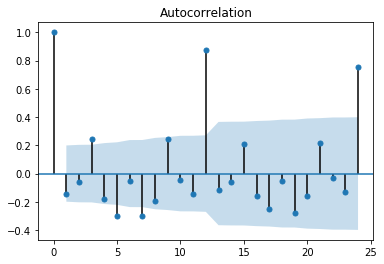

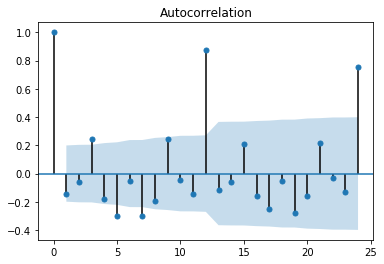

In [6]:
#to plot autocorrelation function for 24 lags
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['g'],lags=24)

In [7]:
#as it can be seen from the autocorrelation function there is seasonality. To fit a sarimax model we need a stationary data. To make the data stationary we have to find the difference
df["dg"]=df['g'].diff(periods=1)
df.head()

,g,dg
Date,,
1/1/2010,44.0,NaN
2/1/2010,108.7,64.7
3/1/2010,119.2,10.5
4/1/2010,96.8,-22.4
5/1/2010,111.4,14.6


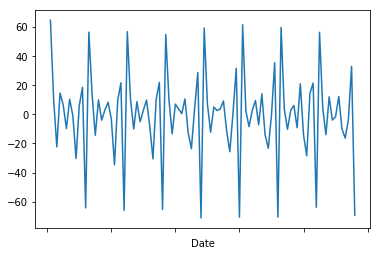

In [8]:
#the plot shows that there is seasonality
df['dg'].plot()
plt.show()

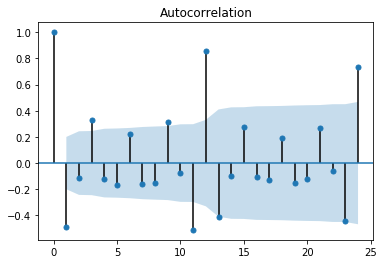

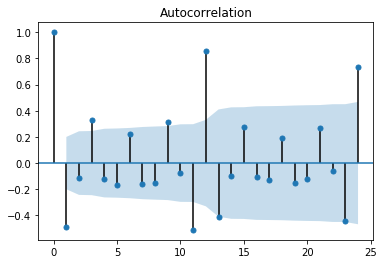

In [9]:
df.dropna(inplace=True)
plot_acf(df['dg'], lags=24)

In [10]:
df["dg"]=df['g'].diff(periods=12)
df.head()

,g,dg
Date,,
2/1/2010,108.7,NaN
3/1/2010,119.2,NaN
4/1/2010,96.8,NaN
5/1/2010,111.4,NaN
6/1/2010,117.8,NaN


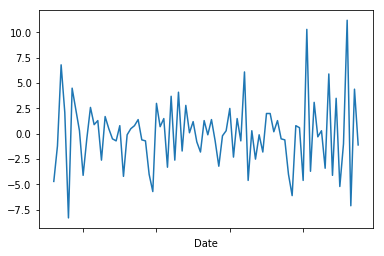

In [11]:
#as we can see now the data is not seasonal
df['dg'].plot()
plt.show()

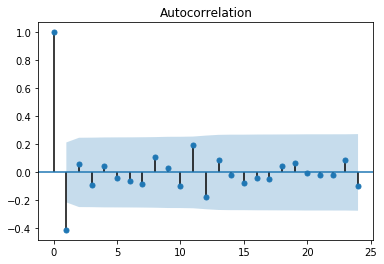

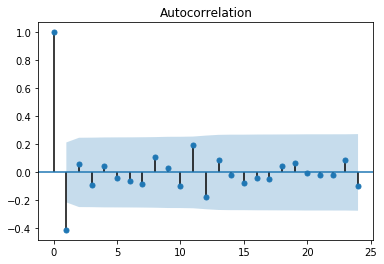

In [12]:
df.dropna(inplace=True)
plot_acf(df['dg'], lags=24)

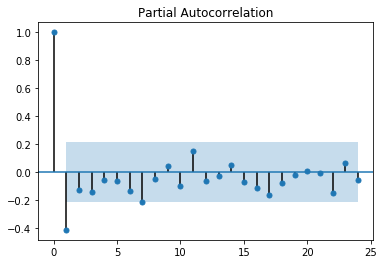

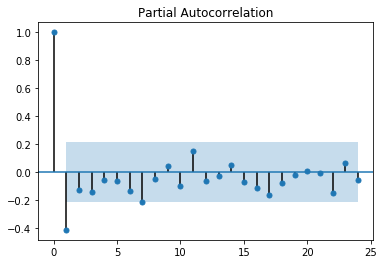

In [13]:
df.dropna(inplace=True)
plot_pacf(df['dg'], lags=24)

In [14]:
#Lets compare the sarimax models and their results

In [15]:
model=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,1,1),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -187.442
Date:                            Tue, 27 Mar 2018   AIC                            380.883
Time:                                    18:23:55   BIC                            388.175
Sample:                                02-01-2011   HQIC                           383.815
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0077      0.017      0.438      0.662      -0.027       0.042
ma.L1         -1.0000    703.570   

In [16]:
model=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,1,1),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -184.261
Date:                            Tue, 27 Mar 2018   AIC                            376.523
Time:                                    18:23:55   BIC                            386.246
Sample:                                02-01-2011   HQIC                           380.431
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.017      0.475      0.635      -0.026       0.042
ma.L1         -1.0000    272.762   

In [17]:
model=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,2,1),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 2, 1)x(0, 1, 0, 12)   Log Likelihood                -223.269
Date:                            Tue, 27 Mar 2018   AIC                            452.539
Time:                                    18:23:55   BIC                            459.831
Sample:                                02-01-2011   HQIC                           455.470
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.030      0.013      0.990      -0.058       0.059
ma.L1         -1.0000   1302.205   

In [18]:
model=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,1,2),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 1, 2)x(0, 1, 0, 12)   Log Likelihood                -179.828
Date:                            Tue, 27 Mar 2018   AIC                            367.657
Time:                                    18:23:56   BIC                            377.380
Sample:                                02-01-2011   HQIC                           371.565
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.011      0.737      0.461      -0.014       0.030
ma.L1         -1.4565    476.098   

In [19]:
model=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,0,1),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 0, 1)x(0, 1, 0, 12)   Log Likelihood                -179.476
Date:                            Tue, 27 Mar 2018   AIC                            364.951
Time:                                    18:23:56   BIC                            372.244
Sample:                                02-01-2011   HQIC                           367.883
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0640      0.226     -0.283      0.777      -0.508       0.380
ma.L1         -0.4630      0.113   

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,1,1),seasonal_order=(0,2,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 2, 0, 12)   Log Likelihood                -182.639
Date:                            Tue, 27 Mar 2018   AIC                            371.279
Time:                                    18:23:57   BIC                            378.571
Sample:                                02-01-2011   HQIC                           374.210
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0072      0.033      0.218      0.827      -0.058       0.072
ma.L1         -1.0000    895.606   

In [22]:
model1=sm.tsa.statespace.SARIMAX(endog=df['g'],order=(0,0,1),seasonal_order=(0,2,0,12),trend='c',enforce_invertibility=False)
result=model1.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  g   No. Observations:                   84
Model:             SARIMAX(0, 0, 1)x(0, 2, 0, 12)   Log Likelihood                -175.247
Date:                            Tue, 27 Mar 2018   AIC                            356.494
Time:                                    18:23:57   BIC                            363.787
Sample:                                02-01-2011   HQIC                           359.426
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1194      0.311      0.384      0.701      -0.490       0.729
ma.L1         -0.4972      0.100   

In [23]:
#SARIMA (0,0,1) x (0,2,0,12) has the lowest AIC indicator. 

In [25]:
#forecast for 9 months
result.forecast(steps=9)

2018-02-01    111.155128
2018-03-01    114.519430
2018-04-01     96.819430
2018-05-01    118.119430
2018-06-01    104.219430
2018-07-01    110.219430
2018-08-01    113.819430
2018-09-01    108.019430
2018-10-01    103.919430
Freq: MS, dtype: float64